In [2]:
import os
from os.path import join
import pandas as pd

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def plot_classification_radar(mean_vals, std_vals, metric_labels, model='HVG'):
    """
    Plots a radar chart of classification metrics with outward error bars and a reference ideal model.

    Parameters:
        mean_vals (pd.Series): Mean values for the metrics.
        std_vals (pd.Series): Standard deviation for the metrics.
        metric_labels (List[str]): List of metric names.
        title (str): Title of the plot.
    """
    num_vars = len(metric_labels)
    
    # Helper to close the radar loop
    def close_circle(values):
        return values.tolist() + values.tolist()[:1]

    # Prepare data
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    mean_values = close_circle(mean_vals)
    std_values = close_circle(std_vals)
    reference_values = close_circle(np.ones(num_vars))

    # Plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot reference line
    ax.plot(angles, reference_values, label='Reference (Ideal)', linewidth=2, color='gray', linestyle='--')

    # Plot mean values
    ax.plot(angles, mean_values, label=model, linewidth=2, color='blue')
    ax.scatter(angles, mean_values, color='blue', s=50)

    # Add one-sided error bars (outward only)
    for i in range(num_vars):
        ax.vlines(angles[i],
                  mean_vals[i],
                  min(1.0, mean_vals[i] + std_vals[i]),
                  color='blue', linewidth=1.5)

    # Labels and formatting
    title=f"Classification Metrics of {model}"
    ax.set_title(title, size=16)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metric_labels, fontsize=12)
    ax.set_rlabel_position(30)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], color='grey', size=10)
    ax.set_ylim(0, 1.05)
    ax.yaxis.grid(True, color='lightgray')
    ax.xaxis.grid(True, color='lightgray')

    # Set outer circle color to gray
    for spine in ax.spines.values():
        spine.set_color('gray')

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function with existing data


In [69]:
dd = df[(df.model=='HVG') & (df.strategy =='avg') ]

In [33]:
means = dd.mean(numeric_only=True)
stds = dd.std(numeric_only=True)

In [40]:
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'AUPRC']

/var/tmp/ipykernel_3724264/2688468124.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_vals[i],
/var/tmp/ipykernel_3724264/2688468124.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min(1.0, mean_vals[i] + std_vals[i]),


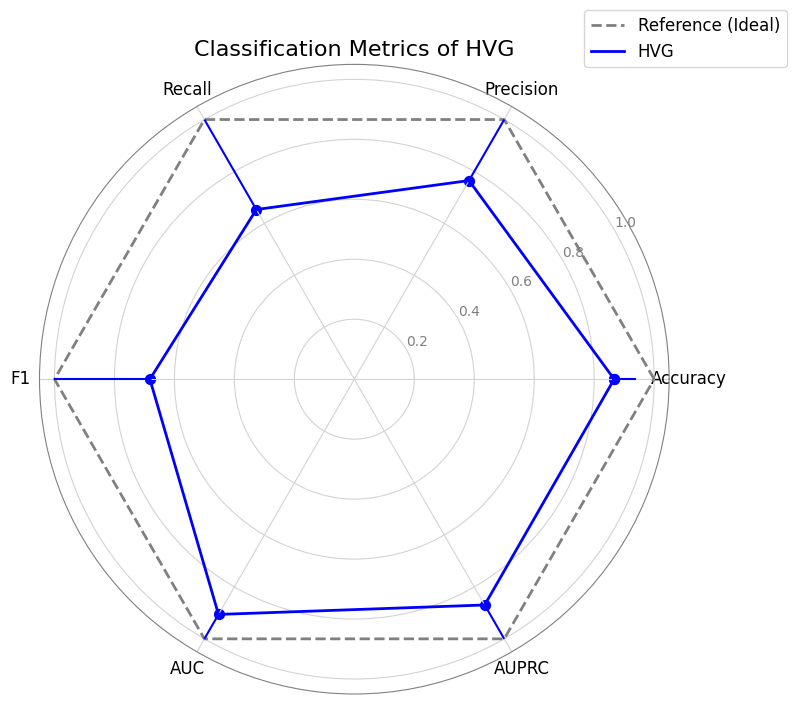

In [41]:
plot_classification_radar(means, stds, metric_labels)

In [36]:
df = pd.read_csv('Tabel7_classification_metrics.csv')

In [38]:
df.rename(columns={'accuracy': 'Accuracy', 'precision': 'Precision', 'recall': 'Recall', 'f1_score': 'F1', 'roc_auc': 'AUC', 'auprc': 'AUPRC'}, inplace=True)

In [42]:
len(df.model.unique())

9

In [101]:
def plot_classification_radar_subplot_with_values_below(ax, mean_vals, std_vals, metric_labels, title="", color='blue'):
    """
    Subplot version of the radar chart with annotated mean values shown below the metric names.
    """
    num_vars = len(metric_labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    def close_circle(values):
        return values.tolist() + values.tolist()[:1]

    mean_values = close_circle(mean_vals)
    std_values = close_circle(std_vals)
    # reference_values = close_circle(np.ones(num_vars))


    reference_values = close_circle(np.clip(mean_vals + std_vals, 0, 1))  # clipped to valid range [0, 1]

    
    # Plot reference line
    ax.plot(angles, reference_values, linewidth=1.5, color='gray', linestyle='--', label='Reference (Ideal)')
    # Plot mean values
    ax.plot(angles, mean_values, linewidth=1.5, color=color, label='Mean')
    ax.scatter(angles, mean_values, color=color, s=20)

    # Add one-sided error bars
    for i in range(num_vars):
        ax.vlines(angles[i],
                  mean_vals[i],
                  min(1.0, mean_vals[i] + std_vals[i]),
                  color=color, linewidth=1)

    # Set axis labels and annotate values under them
    ax.set_xticks(angles[:-1])
    xtick_labels = [
        f"{label}\n {mean_vals[i]:.2f}, {std_vals[i]:.2f}" for i, label in enumerate(metric_labels)
    ]
    ax.set_xticklabels(xtick_labels, fontsize=8)

    ax.set_yticks([0.2, 0.6, 1.0])
    ax.set_yticklabels(["0.2", "0.6", "1.0"], color='grey', size=7)
    ax.set_ylim(0, 1.05)
    ax.set_rlabel_position(0)
    ax.grid(color='lightgray')

    for spine in ax.spines.values():
        spine.set_color('gray')

    ax.set_title(title, fontsize=10)

In [102]:
models= list(df.model.unique())

In [103]:
dd

,model,Accuracy,Precision,Recall,F1,AUC,AUPRC,exp,strategy,exeriment
98,GF-V2-Deep,0.900,0.950,0.867,0.891,1.000,1.000,subtype,mil,ER+ vs TNBC
107,GF-V2-Deep,0.821,0.400,0.400,0.400,0.700,0.633,chemo,mil,Treatment Naive vs Neoadjuvant Chemo
116,GF-V2-Deep,0.753,0.667,0.700,0.633,0.700,0.717,outcome,mil,T-cell exhaustion
125,GF-V2-Deep,0.759,0.803,0.714,0.744,0.848,0.888,pre_post,mil,Treatment Naive vs Anti PD1
134,GF-V2-Deep,1.000,1.000,1.000,1.000,1.000,1.000,luad2,mil,Treatment Naive vs TKI treated


/var/tmp/ipykernel_3724264/3689162703.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_vals[i],
/var/tmp/ipykernel_3724264/3689162703.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min(1.0, mean_vals[i] + std_vals[i]),
/var/tmp/ipykernel_3724264/3689162703.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{label}\n {mean_vals[i]:.2f}, {std_vals[i]:.2f}" for i, label in enumerate(metric_labels)
/var/tmp/ipykernel_

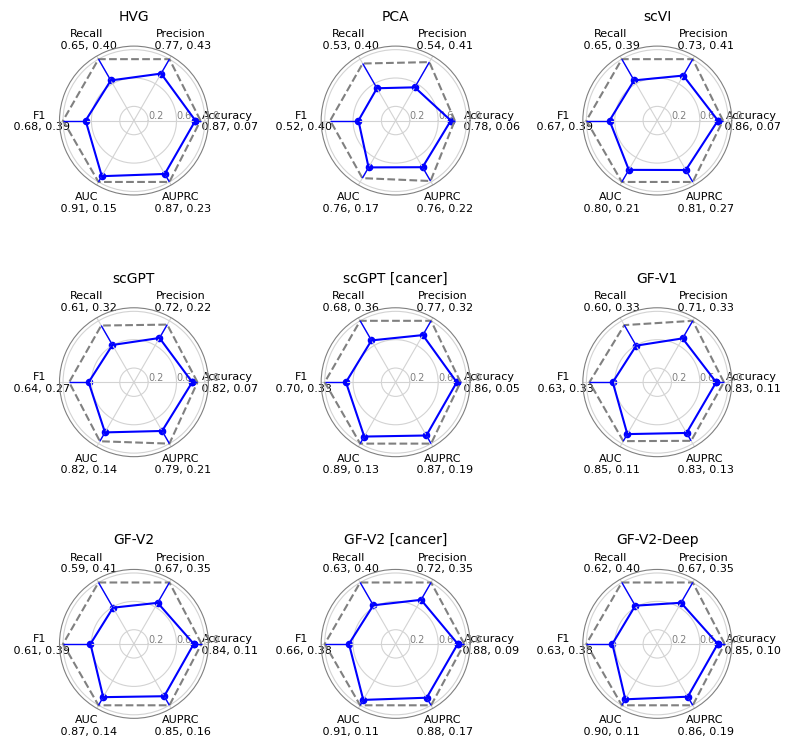

In [104]:
fig, axes = plt.subplots(3, 3, figsize=(8,8 ), subplot_kw=dict(polar=True))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i, (ax, m) in enumerate(zip(axes.flat, models)):
    dd = df[(df.model==m) & (df.strategy =='avg') ]
    means = dd.mean(numeric_only=True)
    stds = dd.std(numeric_only=True)
    plot_classification_radar_subplot_with_values_below(ax, means, stds, metric_labels, title=m, color='blue')

plt.tight_layout()
plt.savefig('avg_rader.png', dpi = 100)

plt.show()

/var/tmp/ipykernel_3724264/3689162703.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_vals[i],
/var/tmp/ipykernel_3724264/3689162703.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min(1.0, mean_vals[i] + std_vals[i]),
/var/tmp/ipykernel_3724264/3689162703.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{label}\n {mean_vals[i]:.2f}, {std_vals[i]:.2f}" for i, label in enumerate(metric_labels)
/var/tmp/ipykernel_

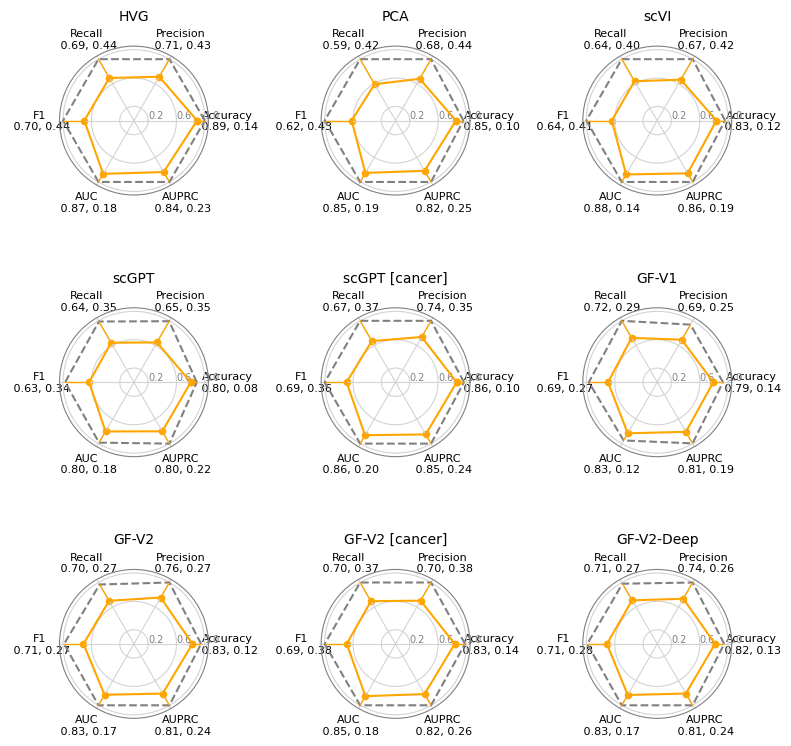

In [105]:
fig, axes = plt.subplots(3, 3, figsize=(8,8 ), subplot_kw=dict(polar=True))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i, (ax, m) in enumerate(zip(axes.flat, models)):
    dd = df[(df.model==m) & (df.strategy =='vote') ]
    means = dd.mean(numeric_only=True)
    stds = dd.std(numeric_only=True)
    plot_classification_radar_subplot_with_values_below(ax, means, stds, metric_labels, title=m, color='orange')

plt.tight_layout()
plt.savefig('vote_rader.png', dpi = 100)

plt.show()

/var/tmp/ipykernel_3724264/3689162703.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_vals[i],
/var/tmp/ipykernel_3724264/3689162703.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min(1.0, mean_vals[i] + std_vals[i]),
/var/tmp/ipykernel_3724264/3689162703.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{label}\n {mean_vals[i]:.2f}, {std_vals[i]:.2f}" for i, label in enumerate(metric_labels)
/var/tmp/ipykernel_

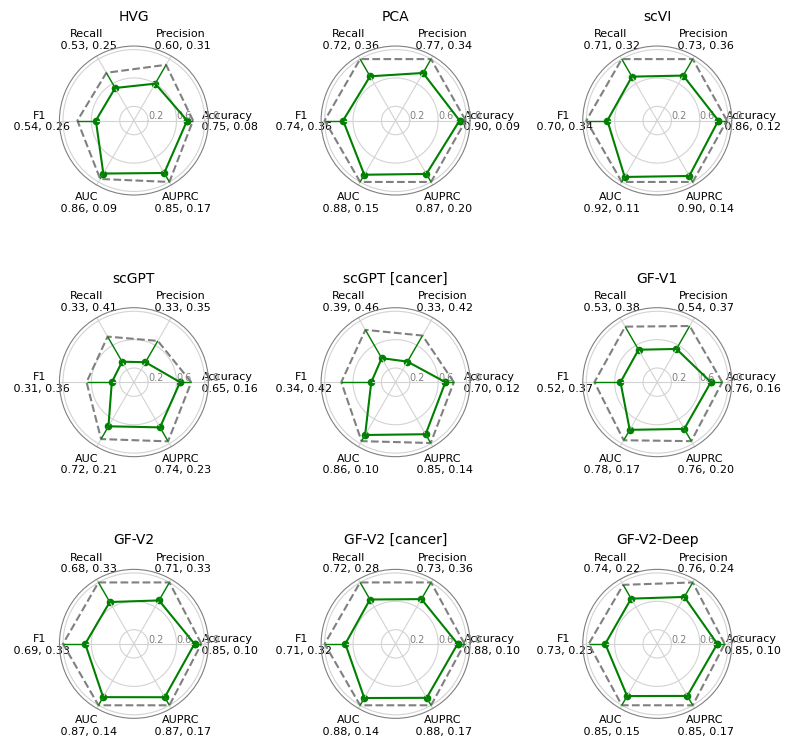

In [106]:
fig, axes = plt.subplots(3, 3, figsize=(8,8 ), subplot_kw=dict(polar=True))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i, (ax, m) in enumerate(zip(axes.flat, models)):
    dd = df[(df.model==m) & (df.strategy =='mil') ]
    means = dd.mean(numeric_only=True)
    stds = dd.std(numeric_only=True)
    plot_classification_radar_subplot_with_values_below(ax, means, stds, metric_labels, title=m, color='green')
# plt.title('Multi-instance Learning (MIL)')
plt.tight_layout()
plt.savefig('mil_rader.png', dpi = 100)
plt.show()

In [12]:
dd.to_csv('hvg.csv')

In [119]:
subfolder_path = './brca_full_subtype'
# subfolder_path = './luad1'

In [120]:
vote_path = os.path.join(subfolder_path, "vote.csv")


In [121]:
vote_df = pd.read_csv(vote_path)

In [122]:
model_name_map={
'hvg': 'HVG',
'pca': 'PCA',
'scgpt': 'scGPT', 
'scgpt_cancer': 'scGPT [cancer]',
'scvi':'scVI',
'gf-6L-30M-i2048': 'GF-V1',
'gf-6L-30M-i2048_continue': 'GF-V1 [continue]',
'Geneformer-V2-104M_CLcancer': 'GF-V2 [cancer]',
'Geneformer-V2-104M': 'GF-V2',
'Geneformer-V2-104M_continue': 'GF-V2 [continue]',
'Geneformer-V2-316M': 'GF-V2-Deep',
'gf-6L-30M-i2048_finetune': 'GF-V1 [finetune]',
'Geneformer-V2-104M_finetune': 'GF-V2 [finetune]',

}

In [123]:
vote_df

,Unnamed: 0,Metrics,model,fold,experiment
0,0,AUC,1.000000,fold_1,hvg
1,1,AUPRC,1.000000,fold_1,hvg
2,2,F1,1.000000,fold_1,hvg
3,3,Accuracy,1.000000,fold_1,hvg
4,4,Precision,1.000000,fold_1,hvg
...,...,...,...,...,...
325,325,AUPRC,0.833333,fold_5,gf-6L-30M-i2048
326,326,F1,0.583333,fold_5,gf-6L-30M-i2048
327,327,Accuracy,0.600000,fold_5,gf-6L-30M-i2048
328,328,Precision,0.750000,fold_5,gf-6L-30M-i2048


In [124]:
vote_df['experiment'] = vote_df['experiment'].map(model_name_map)

In [125]:
vote_df

,Unnamed: 0,Metrics,model,fold,experiment
0,0,AUC,1.000000,fold_1,HVG
1,1,AUPRC,1.000000,fold_1,HVG
2,2,F1,1.000000,fold_1,HVG
3,3,Accuracy,1.000000,fold_1,HVG
4,4,Precision,1.000000,fold_1,HVG
...,...,...,...,...,...
325,325,AUPRC,0.833333,fold_5,GF-V1
326,326,F1,0.583333,fold_5,GF-V1
327,327,Accuracy,0.600000,fold_5,GF-V1
328,328,Precision,0.750000,fold_5,GF-V1


In [126]:
list(vote_df.experiment.unique())

['HVG',
 'GF-V1 [finetune]',
 'PCA',
 'scGPT',
 'scGPT [cancer]',
 'GF-V2 [cancer]',
 'GF-V2',
 'GF-V2 [finetune]',
 'GF-V2-Deep',
 'scVI',
 'GF-V1']

In [127]:
# mil_df.groupby(['Metrics', 'experiment']).mean()
vote_stats = vote_df.groupby(['experiment', 'Metrics'])['model'].agg(['mean', 'std']).reset_index()

In [128]:
v1_finetune_df = vote_stats [vote_stats['experiment'] =='GF-V1 [finetune]']
v1_df = vote_stats [vote_stats['experiment'] =='GF-V1']

In [130]:
finetune_df = vote_stats [vote_stats['experiment'] =='GF-V2 [finetune]']
cacner_df = vote_stats [vote_stats['experiment'] =='GF-V2 [cancer]']
v2_df = vote_stats [vote_stats['experiment'] =='GF-V2']

In [131]:
v2_df_pivot = v2_df.pivot(index='experiment', columns='Metrics', values='mean')
finetune_df_pivot = finetune_df.pivot(index='experiment', columns='Metrics', values='mean')
cacner_df_pivot = cacner_df.pivot(index='experiment', columns='Metrics', values='mean')


In [139]:
def plot_radar_chart(dataframes, labels=None, title='Classification Metrics'):
    """
    Plot a radar chart for multiple models from multiple DataFrames.

    Parameters:
    - dataframes: list of pd.DataFrame
        Each dataframe should have one row per model and columns representing metrics.
    - labels: list of str (optional)
        Labels for each dataframe (e.g., different datasets or experimental settings).
    - title: str
        Title of the plot.
    """

    num_metrics = dataframes[0].shape[1]
    metric_labels = dataframes[0].columns.tolist()

    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    if labels is None:
        labels = [f"DataFrame {i+1}" for i in range(len(dataframes))]

    for df, label in zip(dataframes, labels):
        for idx in df.index:
            values = df.loc[idx].tolist()
            values += values[:1]
            ax.plot(angles, values, label=f"{label} - {idx}")
            ax.fill(angles, values, alpha=0.05)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metric_labels, fontsize=16)
    ax.set_title(title, size=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.tight_layout()
    plt.show()
    return fig

In [140]:
results_df

Metrics,AUC,AUPRC,Accuracy,F1,Precision,Recall
experiment,,,,,,
GF-V2,0.788889,0.788889,0.706667,0.656429,0.693333,0.700000
GF-V2 [finetune],0.844444,0.851111,0.740000,0.716190,0.725000,0.733333
GF-V2 [cancer],0.888889,0.883333,0.740000,0.690714,0.718333,0.733333


In [141]:
results_df = pd.concat([v2_df_pivot, finetune_df_pivot, cacner_df_pivot])

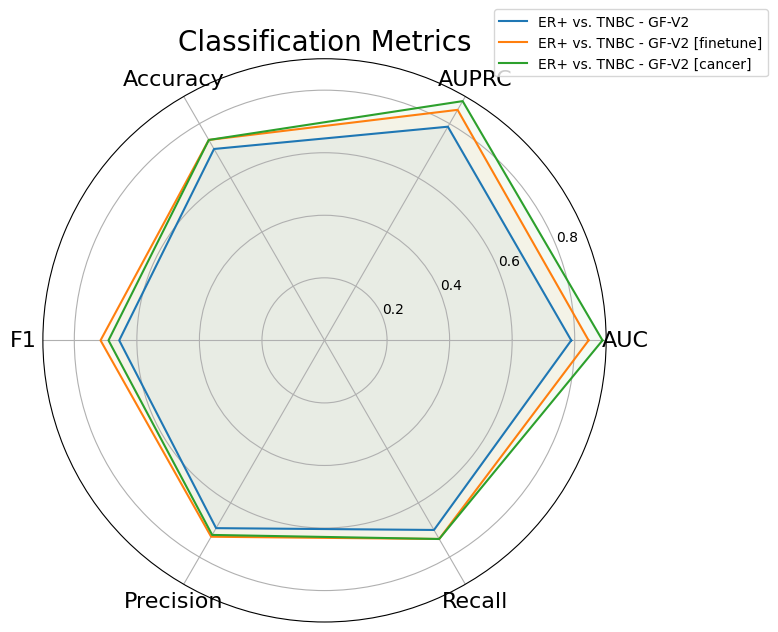

In [142]:
fig = plot_radar_chart([results_df], labels=["ER+ vs. TNBC"])

In [143]:
fig.savefig('gf2_finetune_raddar.png', dpi=100)

In [82]:
v1_results= [v1_finetune_df, v1_df]
plot_radar_chart([v1_results], labels=["Subtype V1"])

AttributeError: 'list' object has no attribute 'shape'

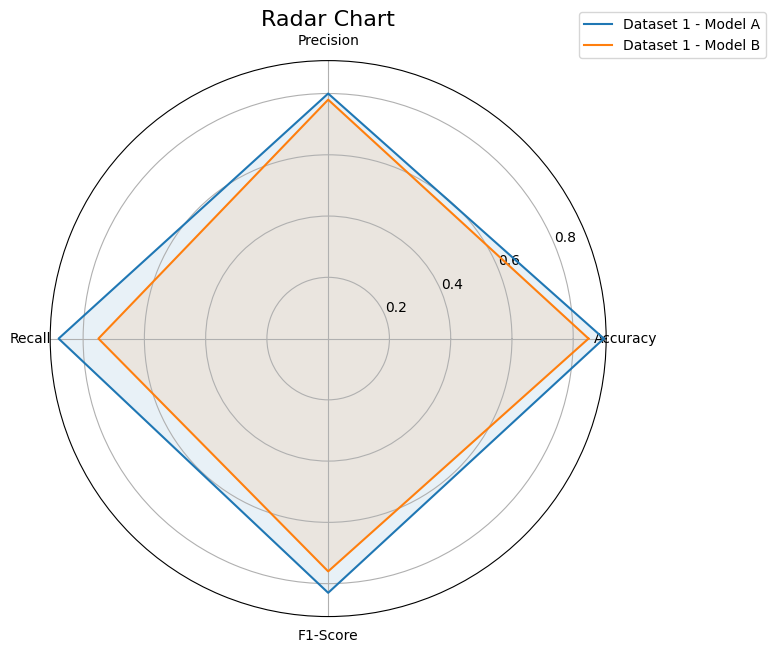

In [43]:
# Create two example dataframes with metrics
df1 = pd.DataFrame({
    'Accuracy': [0.9, 0.85],
    'Precision': [0.8, 0.78],
    'Recall': [0.88, 0.75],
    'F1-Score': [0.83, 0.76]
}, index=['Model A', 'Model B'])

df2 = pd.DataFrame({
    'Accuracy': [0.87, 0.82],
    'Precision': [0.82, 0.77],
    'Recall': [0.85, 0.73],
    'F1-Score': [0.84, 0.74]
}, index=['Model A', 'Model B'])

plot_radar_chart([df1], labels=["Dataset 1"])


In [ ]:
def load_metrics_from_folder(base_path):
    """
    Reads cls_metrics_vote.csv and cls_metrics_mil.csv from each subfolder in the base path.
    Returns a dictionary with classifier names as keys and a tuple of DataFrames (mil_df, vote_df) as values.
    """
    classifier_data = {}
    for subfolder in os.listdir(base_path):
        subfolder_path = os.path.join(base_path, subfolder)
        if os.path.isdir(subfolder_path):
            mil_path = os.path.join(subfolder_path, "cls_metrics_mil.csv")
            vote_path = os.path.join(subfolder_path, "cls_metrics_vote.csv")
            avg_path = os.path.join(subfolder_path, "cls_metrics_avg_expr.csv")
            if os.path.exists(mil_path) and os.path.exists(vote_path):
                mil_df = pd.read_csv(mil_path)
                vote_df = pd.read_csv(vote_path)
                avg_df = pd.read_csv(avg_path)
                classifier_data[subfolder] = (mil_df, vote_df, avg_df)
    return classifier_data

In [ ]:
def load_metrics_from_folder(base_path):
    """
    Reads cls_metrics_vote.csv and cls_metrics_mil.csv from each subfolder in the base path.
    Returns a dictionary with classifier names as keys and a tuple of DataFrames (mil_df, vote_df) as values.
    """
    classifier_data = {}
    for subfolder in os.listdir(base_path):
        subfolder_path = os.path.join(base_path, subfolder)
        if os.path.isdir(subfolder_path):
            mil_path = os.path.join(subfolder_path, "cls_metrics_mil.csv")
            vote_path = os.path.join(subfolder_path, "cls_metrics_vote.csv")
            avg_path = os.path.join(subfolder_path, "cls_metrics_avg_expr.csv")
            if os.path.exists(mil_path) and os.path.exists(vote_path):
                mil_df = pd.read_csv(mil_path)
                vote_df = pd.read_csv(vote_path)
                avg_df = pd.read_csv(avg_path)
                classifier_data[subfolder] = (mil_df, vote_df, avg_df)
    return classifier_data

def plot_radar_for_classifiers(classifier_data, columns=3):
    """
    Plots radar diagrams for each classifier using their metrics.
    The plots are arranged in a grid with the specified number of columns.
    """
    n_classifiers = len(classifier_data)
    rows = math.ceil(n_classifiers / columns)

    fig, axs = plt.subplots(rows, columns, figsize=(6 * columns, 6 * rows), subplot_kw=dict(polar=True))
    axs = axs.flatten()  # Flatten in case it's a 2D array

    for i, (classifier, (mil_df, vote_df, avg_df)) in enumerate(classifier_data.items()):
        ax = axs[i]

        metrics = mil_df['Metrics'].tolist()
        mil_scores = mil_df['randomforest'].tolist()
        vote_scores = vote_df['randomforest'].tolist()
        avg_scores = avg_df['randomforest'].tolist()

        # Check for consistent lengths
        if not (len(metrics) == len(mil_scores) == len(vote_scores)):
            print(f"Skipping {classifier} due to mismatched lengths:")
            print(f"Metrics: {len(metrics)}, MIL: {len(mil_scores)}, Vote: {len(vote_scores)}")
            continue
        noise_std =.005
        mil_scores = [x + np.random.normal(0, noise_std) for x in mil_scores]
        vote_scores = [x + np.random.normal(0, noise_std) for x in vote_scores]
        avg_scores = [x + np.random.normal(0, noise_std) for x in avg_scores]
        
        # Close the radar chart
        metrics.append(metrics[0])
        mil_scores.append(mil_scores[0])
        vote_scores.append(vote_scores[0])
        avg_scores.append(avg_scores[0])
        
        angles = np.linspace(0, 2 * np.pi, len(metrics)).tolist()

        ax.plot(angles, mil_scores, label='MIL', linewidth=2, color='tab:blue')
        # ax.fill(angles, mil_scores, alpha=0.1, color='tab:blue')

        ax.plot(angles, vote_scores, label='Vote', linewidth=2, color='tab:orange')
        # ax.fill(angles, vote_scores, alpha=0.1, color='tab:orange')

        ax.plot(angles, avg_scores, label='Avg.', linewidth=2, color='tab:green')
        # ax.fill(angles, avg_scores, alpha=0.1, color='tab:green')
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics[:-1])
        ax.set_yticks(np.linspace(0, 1, 5))
        ax.set_yticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'])
        ax.set_title(f'{classifier}', size=14, pad=20)

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    fig.legend(['MIL', 'Vote', 'Avg.'], loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.02))
    plt.tight_layout()
    # plt.show()
    return fig